# Importing Libraries

In [165]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import AdaBoostClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.decomposition import PCA
import sweetviz as sv

# Importing Dataset

In [166]:
train_data=pd.read_csv(r"train.csv")
test_data=pd.read_csv(r"test.csv")

# Preprocessing Training Data

In [167]:
train_data.describe

<bound method NDFrame.describe of       Loan_ID  Gender Married Dependents     Education Self_Employed  \
0    LP001002    Male      No          0      Graduate            No   
1    LP001003    Male     Yes          1      Graduate            No   
2    LP001005    Male     Yes          0      Graduate           Yes   
3    LP001006    Male     Yes          0  Not Graduate            No   
4    LP001008    Male      No          0      Graduate            No   
..        ...     ...     ...        ...           ...           ...   
609  LP002978  Female      No          0      Graduate            No   
610  LP002979    Male     Yes         3+      Graduate            No   
611  LP002983    Male     Yes          1      Graduate            No   
612  LP002984    Male     Yes          2      Graduate            No   
613  LP002990  Female      No          0      Graduate           Yes   

     ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0               5849        

In [168]:
train_data.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [169]:
train_data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [170]:
print(train_data.shape)
print(test_data.shape)

(614, 13)
(367, 12)


In [171]:
train_data.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [172]:
null_percent = (train_data.isnull().sum()/train_data.shape[0])*100
null_percent

Loan_ID              0.000000
Gender               2.117264
Married              0.488599
Dependents           2.442997
Education            0.000000
Self_Employed        5.211726
ApplicantIncome      0.000000
CoapplicantIncome    0.000000
LoanAmount           3.583062
Loan_Amount_Term     2.280130
Credit_History       8.143322
Property_Area        0.000000
Loan_Status          0.000000
dtype: float64

                                             |                                             | [  0%]   00:00 ->…


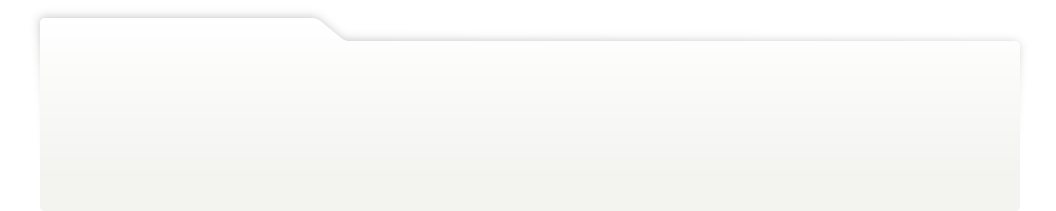
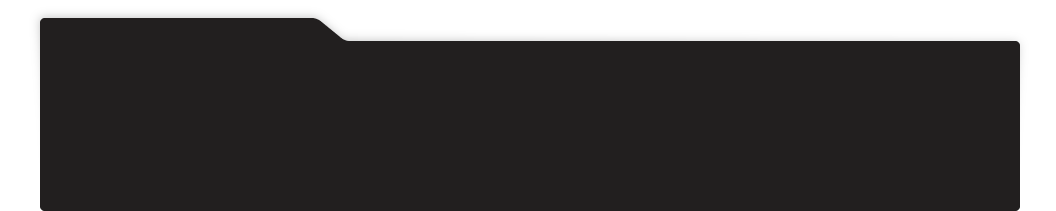
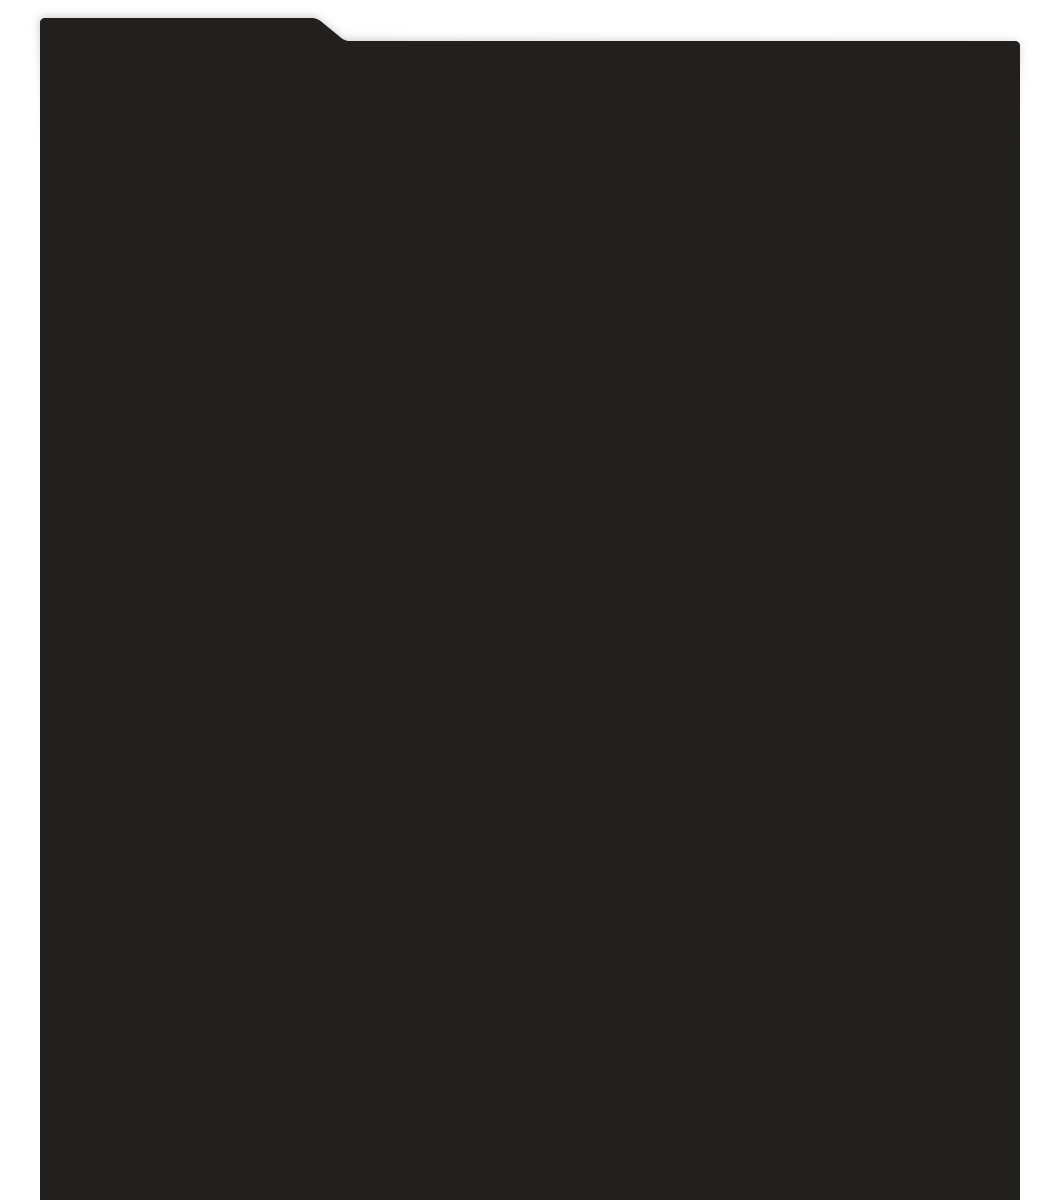
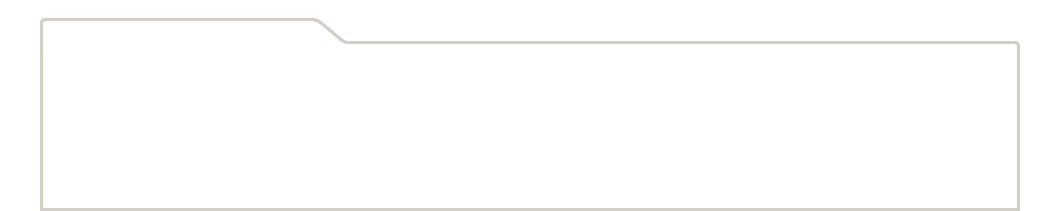
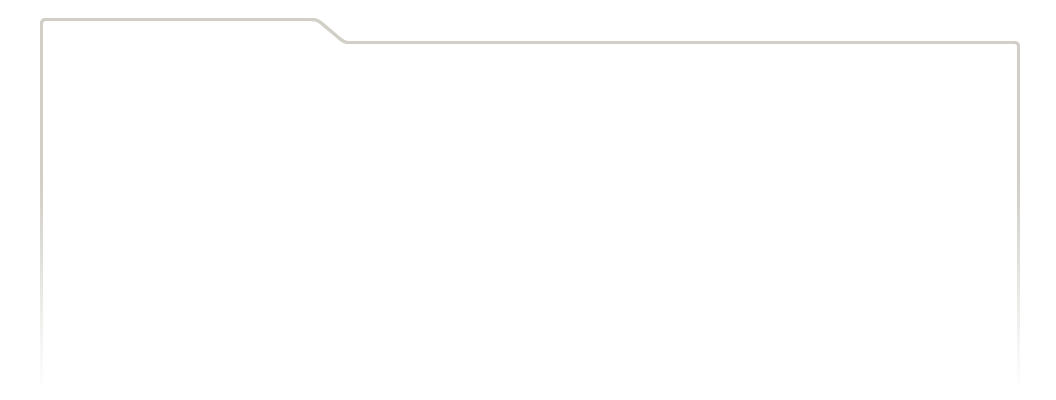
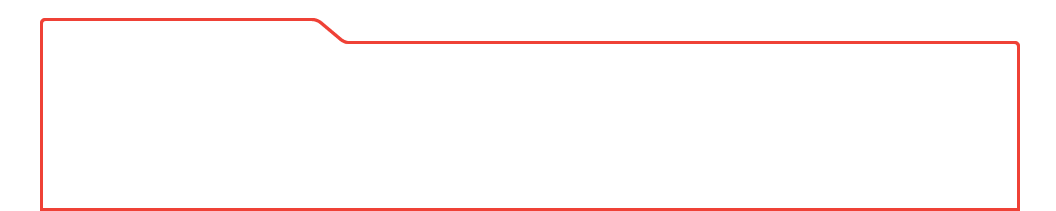
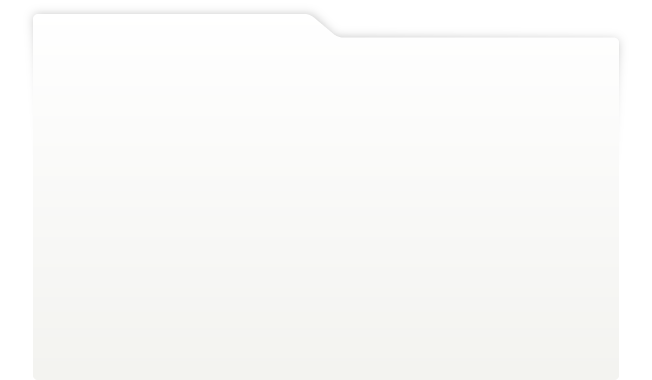
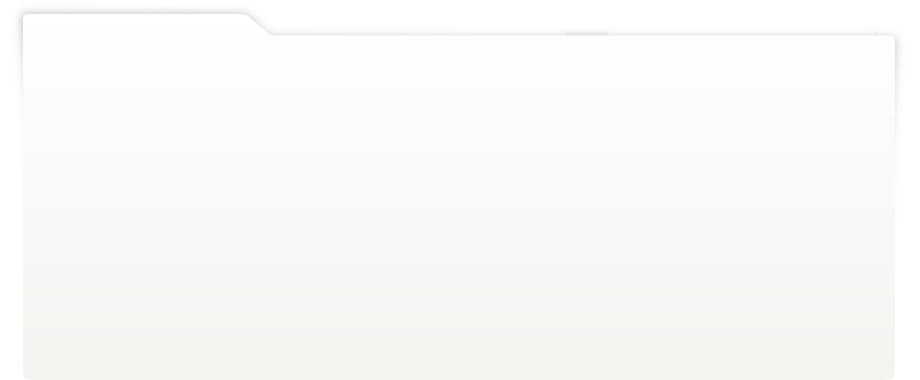
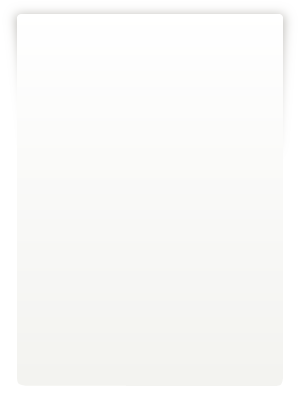
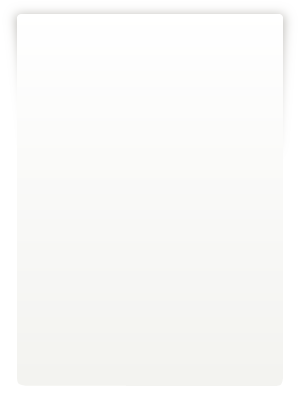
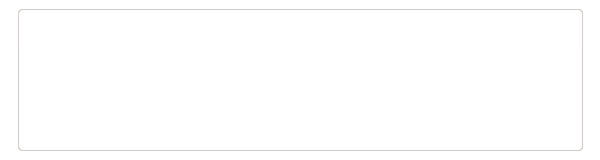
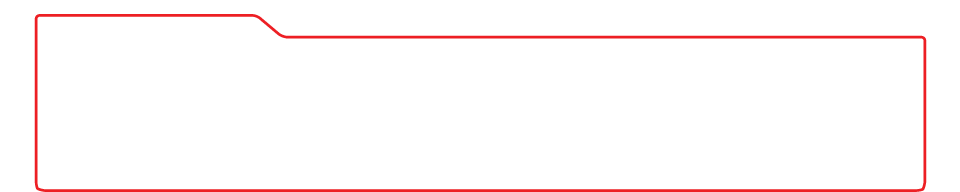
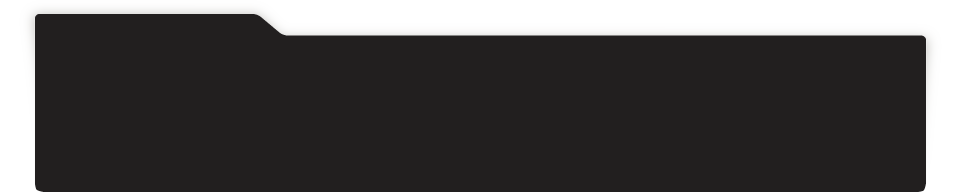
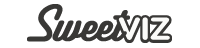
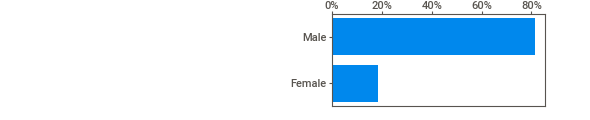
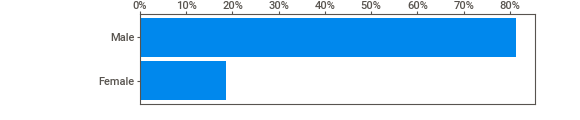
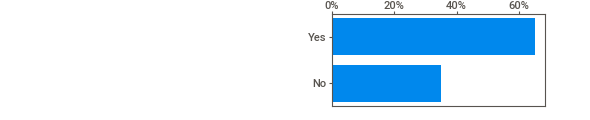
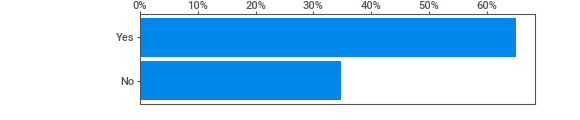
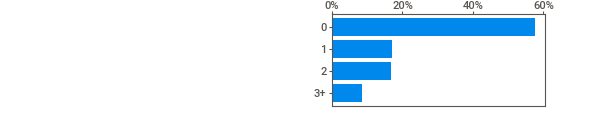
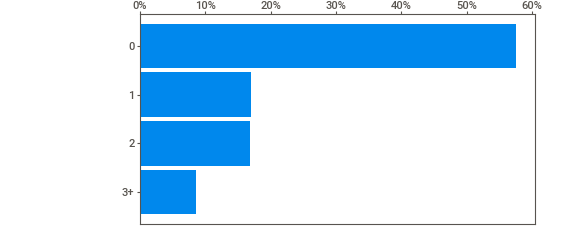
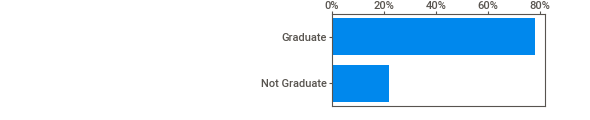
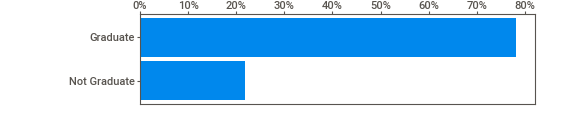
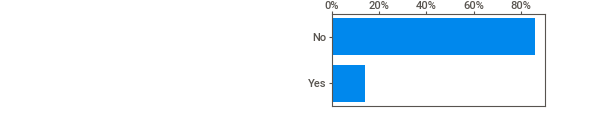
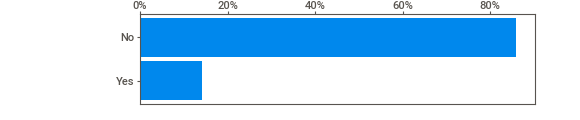
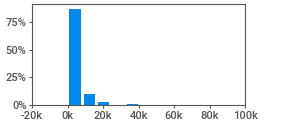
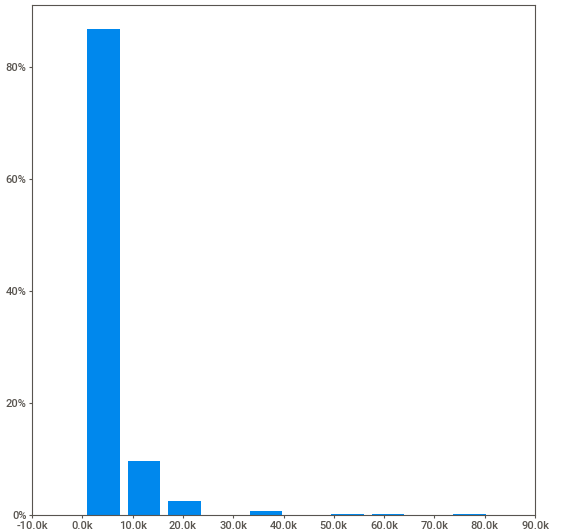
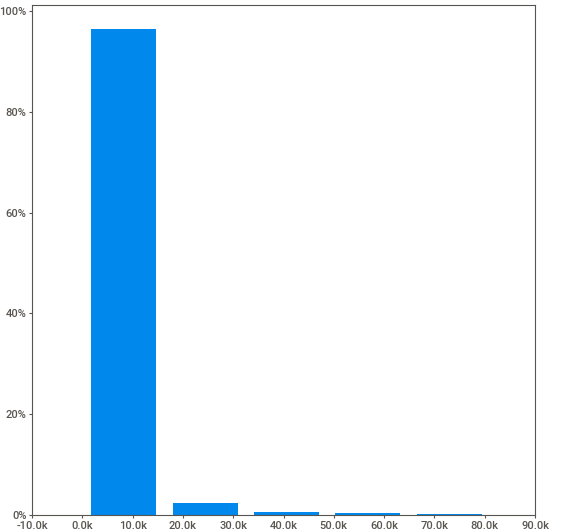
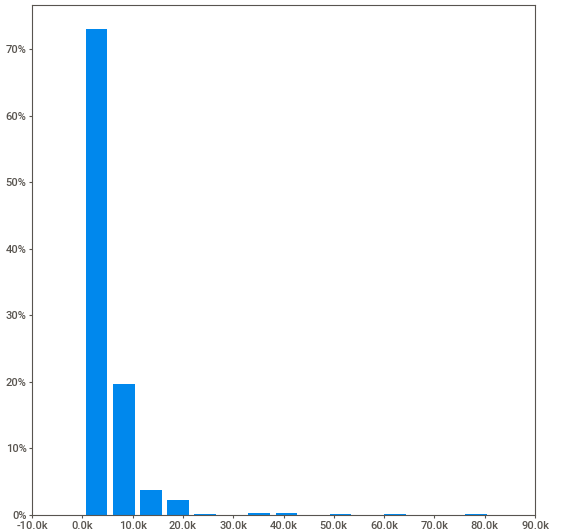
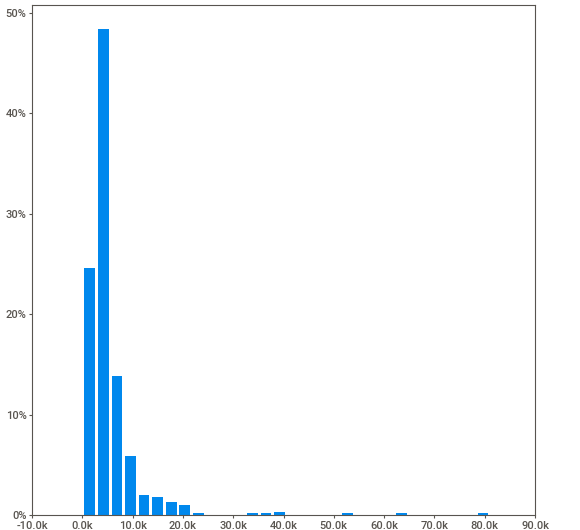
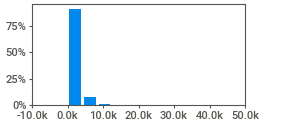
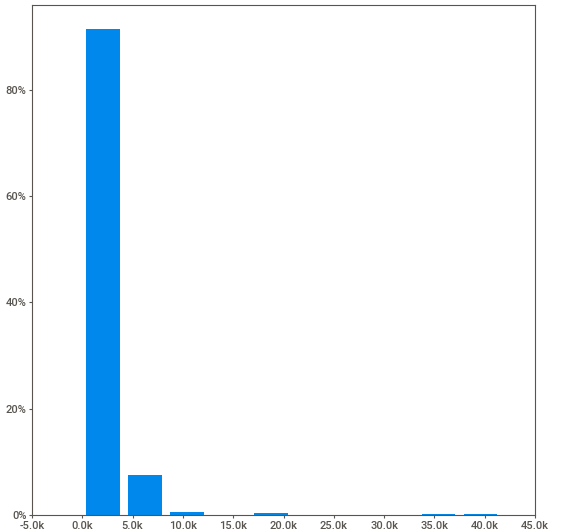
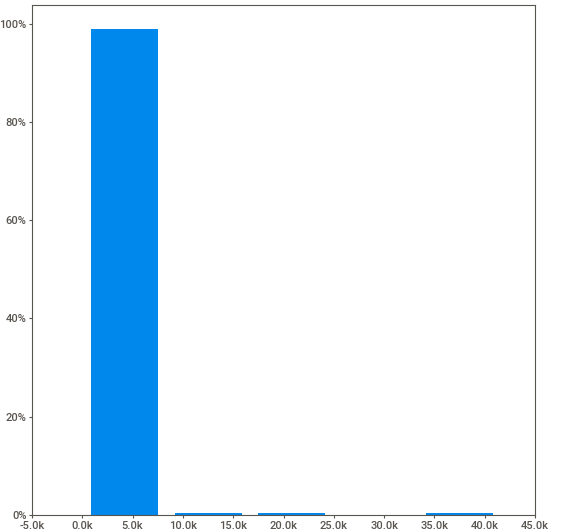
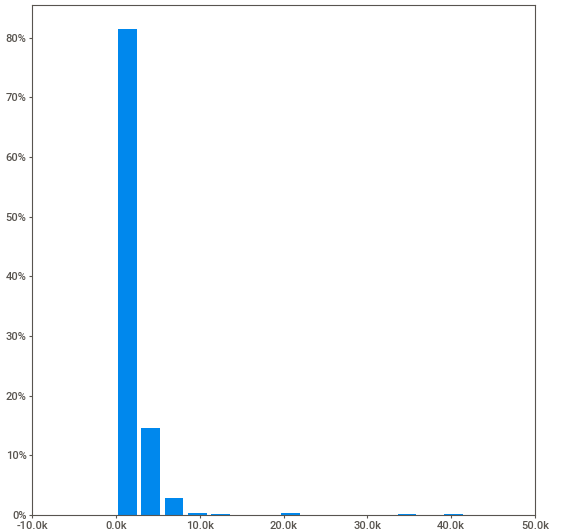
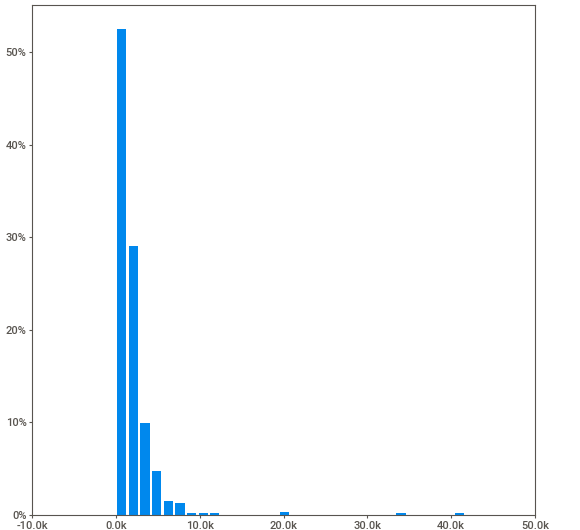
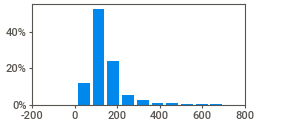
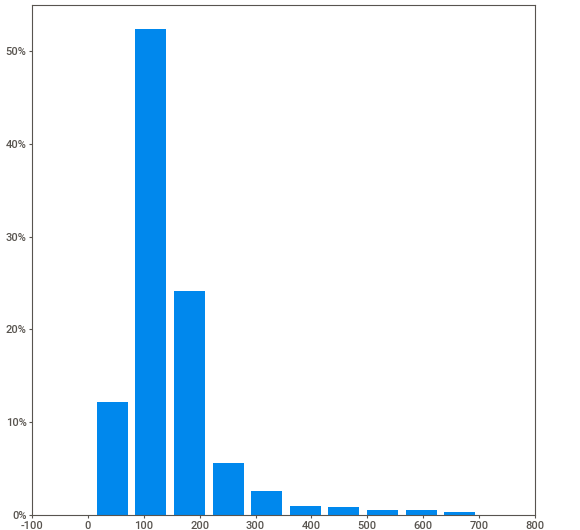
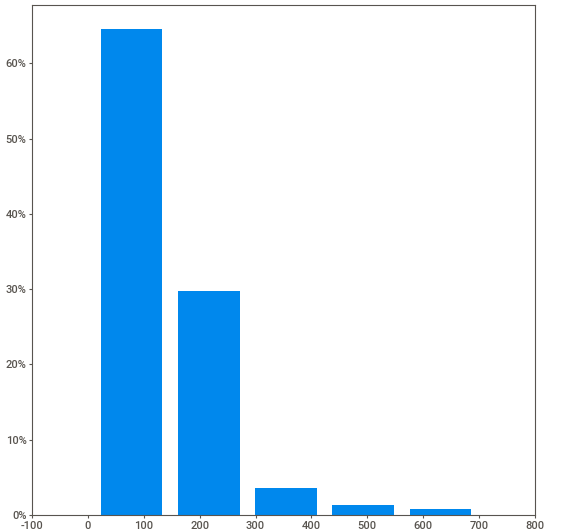
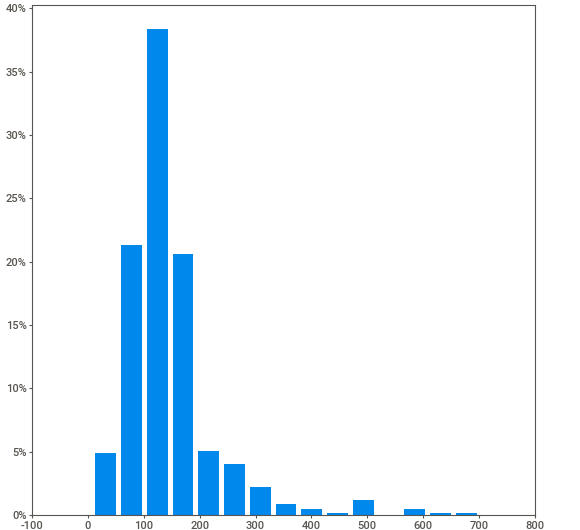
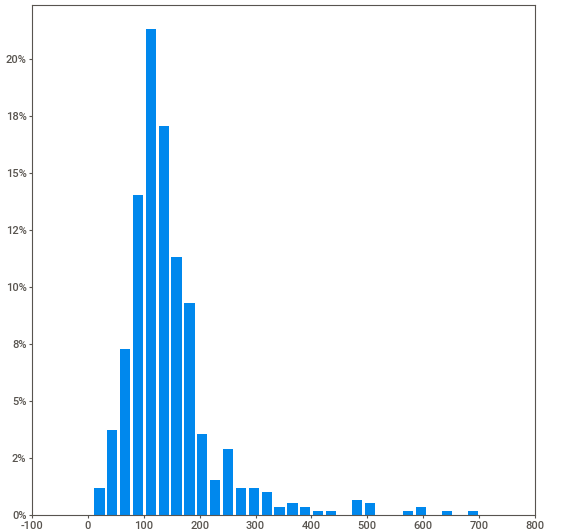
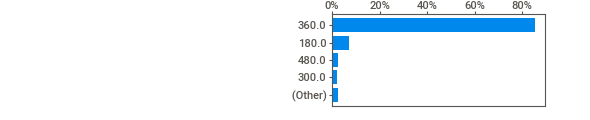
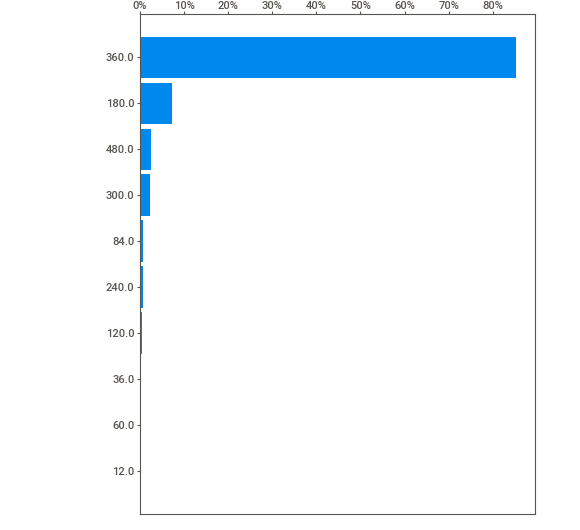
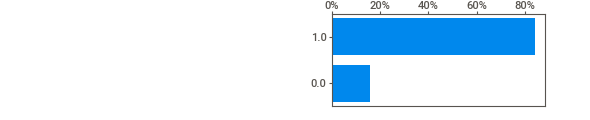
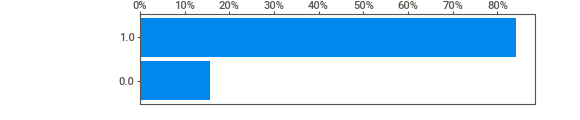
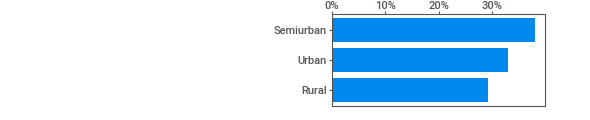
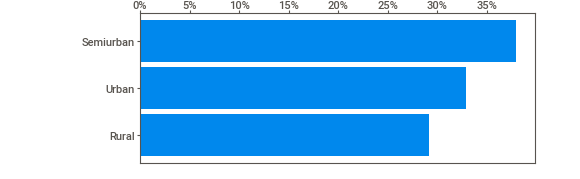
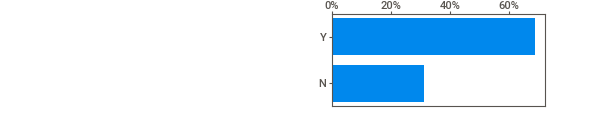
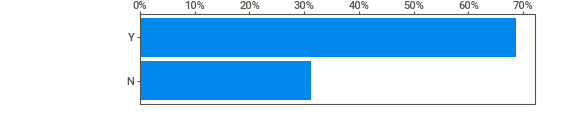
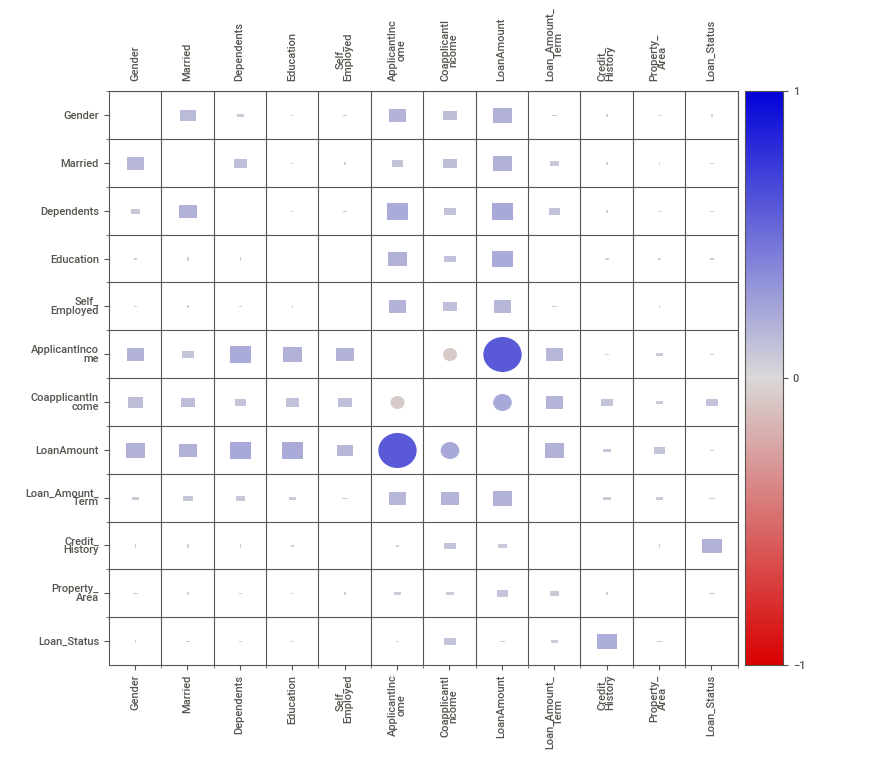
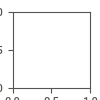

In [173]:
report = sv.analyze(train_data)
report.show_notebook()

### Encoding Categorical Data

In [174]:
train_data["Gender"]=le.fit_transform(train_data["Gender"])
train_data["Self_Employed"]=le.fit_transform(train_data["Self_Employed"])
train_data["Dependents"]=le.fit_transform(train_data["Dependents"])
train_data["Married"]=le.fit_transform(train_data["Married"])
train_data["Property_Area"]=le.fit_transform(train_data["Property_Area"])
train_data["Education"]=le.fit_transform(train_data["Education"])
train_data["Loan_Status"]=le.fit_transform(train_data["Loan_Status"])

In [175]:
train_data.dtypes

Loan_ID               object
Gender                 int32
Married                int32
Dependents             int32
Education              int32
Self_Employed          int32
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area          int32
Loan_Status            int32
dtype: object

In [176]:
train_data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,1,0,0,0,0,5849,0.0,NaN,360.0,1.0,2,1
1,LP001003,1,1,1,0,0,4583,1508.0,128.0,360.0,1.0,0,0
2,LP001005,1,1,0,0,1,3000,0.0,66.0,360.0,1.0,2,1
3,LP001006,1,1,0,1,0,2583,2358.0,120.0,360.0,1.0,2,1
4,LP001008,1,0,0,0,0,6000,0.0,141.0,360.0,1.0,2,1


### Filling NULL Values

In [177]:
train_data["Gender"].fillna(train_data["Gender"].mode()[0])
train_data["Married"].fillna(train_data["Married"].mode()[0])
train_data['Dependents'].fillna(train_data["Dependents"].mode()[0])
train_data["Self_Employed"].fillna(train_data["Self_Employed"].mode()[0])
train_data["Credit_History"]=train_data["Credit_History"].fillna(train_data["Credit_History"].mode()[0])

In [178]:
train_data["Loan_Amount_Term"]=train_data["Loan_Amount_Term"].fillna(train_data["Loan_Amount_Term"].mode()[0])

In [179]:
train_data["LoanAmount"]=train_data["LoanAmount"].fillna(train_data["LoanAmount"].median())

In [180]:
train_data["Total_Income"]=train_data["ApplicantIncome"]+train_data["CoapplicantIncome"]

In [181]:
train_data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Total_Income
0,LP001002,1,0,0,0,0,5849,0.0,128.0,360.0,1.0,2,1,5849.0
1,LP001003,1,1,1,0,0,4583,1508.0,128.0,360.0,1.0,0,0,6091.0
2,LP001005,1,1,0,0,1,3000,0.0,66.0,360.0,1.0,2,1,3000.0
3,LP001006,1,1,0,1,0,2583,2358.0,120.0,360.0,1.0,2,1,4941.0
4,LP001008,1,0,0,0,0,6000,0.0,141.0,360.0,1.0,2,1,6000.0


In [182]:
train_data.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
Total_Income         0
dtype: int64

In [183]:
train_data.shape

(614, 14)

In [184]:
train_data.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status',
       'Total_Income'],
      dtype='object')

# Preprocessing Test Data

In [185]:
test_data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban


In [186]:
test_data.shape

(367, 12)

In [187]:
test_data.isnull().sum()

Loan_ID               0
Gender               11
Married               0
Dependents           10
Education             0
Self_Employed        23
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            5
Loan_Amount_Term      6
Credit_History       29
Property_Area         0
dtype: int64

### Encoding The Categorical Data

In [188]:
test_data["Gender"]=le.fit_transform(test_data["Gender"])
test_data["Self_Employed"]=le.fit_transform(test_data["Self_Employed"])
test_data["Dependents"]=le.fit_transform(test_data["Dependents"])
test_data["Married"]=le.fit_transform(test_data["Married"])
test_data["Property_Area"]=le.fit_transform(test_data["Property_Area"])
test_data["Education"]=le.fit_transform(test_data["Education"])

### Filling The NULL Values

In [189]:
test_data["Gender"].fillna(test_data["Gender"].mode()[0])
test_data["Married"].fillna(test_data["Married"].mode()[0])
test_data['Dependents'].fillna(test_data["Dependents"].mode()[0])
test_data["Self_Employed"].fillna(test_data["Self_Employed"].mode()[0])
test_data["Credit_History"]=test_data["Credit_History"].fillna(test_data["Credit_History"].mode()[0])

In [190]:
test_data["Loan_Amount_Term"]=test_data["Loan_Amount_Term"].fillna(test_data["Loan_Amount_Term"].mode()[0])

In [191]:
test_data["LoanAmount"]=test_data["LoanAmount"].fillna(test_data["LoanAmount"].median())

In [192]:
test_data.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
dtype: int64

In [193]:
test_data.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area'],
      dtype='object')

# Visiualizing Training Data

C:\Users\ASUS\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Loan_Status', ylabel='count'>

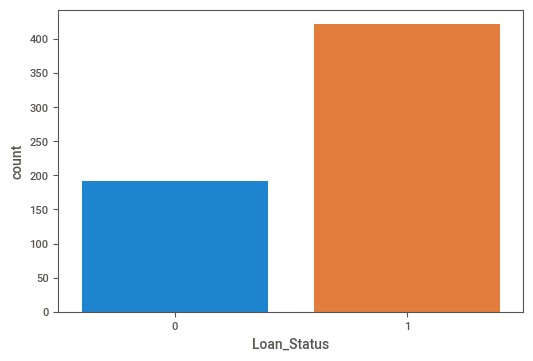

In [194]:
sns.countplot(train_data["Loan_Status"])

C:\Users\ASUS\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Gender', ylabel='count'>

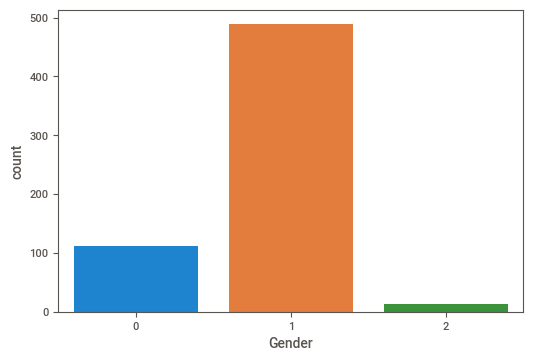

In [195]:
sns.countplot(train_data["Gender"])

C:\Users\ASUS\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Education', ylabel='count'>

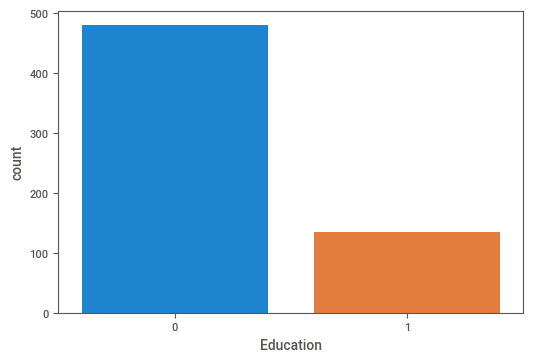

In [196]:
sns.countplot(train_data["Education"])

C:\Users\ASUS\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Self_Employed', ylabel='count'>

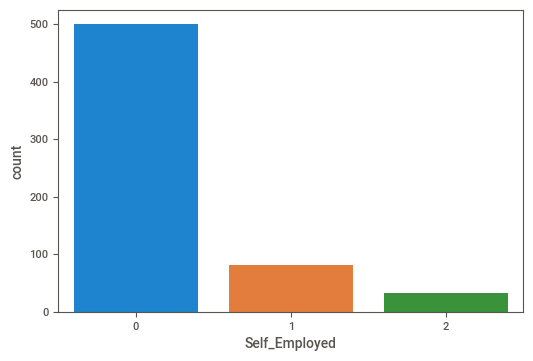

In [197]:
sns.countplot(train_data["Self_Employed"])

C:\Users\ASUS\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Credit_History', ylabel='count'>

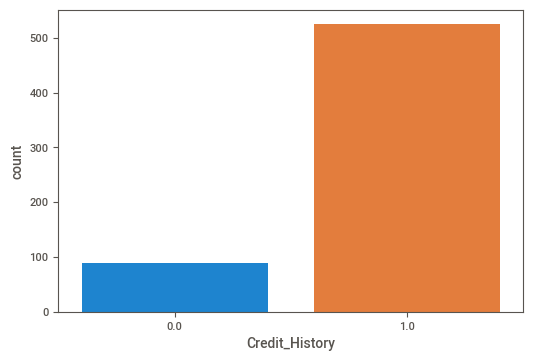

In [198]:
sns.countplot(train_data["Credit_History"])

<AxesSubplot:ylabel='None'>

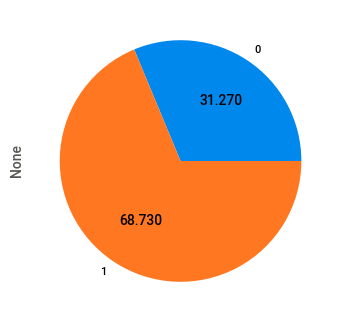

In [199]:
train_data.groupby('Loan_Status').size().plot(kind='pie', autopct='%.3f')

In [200]:
train_data["Property_Area"].value_counts()

1    233
2    202
0    179
Name: Property_Area, dtype: int64

In [201]:
train_data=train_data.drop(["ApplicantIncome","CoapplicantIncome"], axis=1)

<AxesSubplot:>

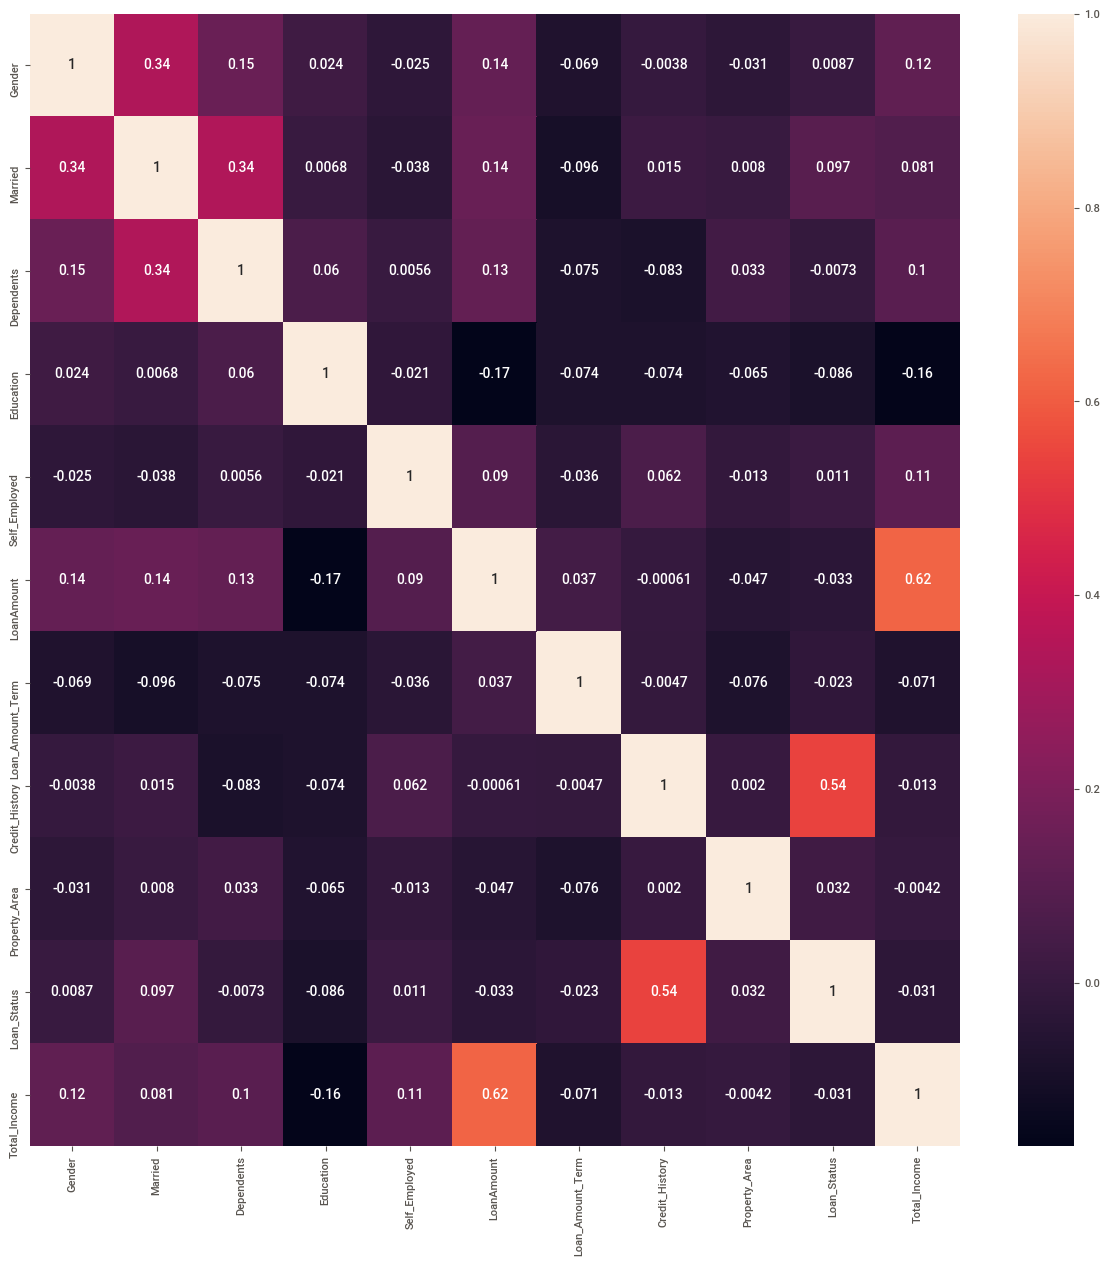

In [202]:
plt.figure(figsize=(15,15))
sns.heatmap(train_data.corr(),annot=True)

In [203]:
corr_matrix = train_data.corr(method = 'pearson')
corr_matrix['Loan_Status'].sort_values(ascending = False)

Loan_Status         1.000000
Credit_History      0.540556
Married             0.096657
Property_Area       0.032112
Self_Employed       0.010880
Gender              0.008690
Dependents         -0.007318
Loan_Amount_Term   -0.022549
Total_Income       -0.031271
LoanAmount         -0.033214
Education          -0.085884
Name: Loan_Status, dtype: float64

In [204]:
y=train_data['Loan_Status']


In [205]:
y.shape

(614,)

In [206]:
train_data=train_data.drop(['Loan_Status','Loan_ID'],axis=1)


In [207]:
train_data.shape

(614, 10)

## Splitting The DataSet Without SMOTE

In [208]:
train_x,test_x,train_y,test_y=train_test_split(train_data,y,random_state=555,test_size=0.3)

In [209]:
print(train_x.shape)
print(test_x.shape)
print(train_y.shape)
print(test_y.shape)

(429, 10)
(185, 10)
(429,)
(185,)


### Using AdaBoost Classifier

In [210]:
ada=AdaBoostClassifier()
ada.fit(train_x,train_y)
pred_ada=ada.predict(test_x)
accuracy_ada=metrics.accuracy_score(test_y,pred_ada)
print("The confussion metrix for AdaBoost is:\n",metrics.confusion_matrix(test_y,pred_ada))
print("The accuracy of AdaBoost Classifier is:\t\t",accuracy_ada)
print("The recal score of AdaBoost Classifier is is:\t\t",metrics.recall_score(test_y,pred_ada))
print("The precision of AdaBoost Classifier is:\t\t",metrics.precision_score(test_y,pred_ada))
print("The f1 score of AdaBoost Classifier is:\t\t",metrics.f1_score(test_y,pred_ada))

The confussion metrix for AdaBoost is:
 [[ 33  28]
 [ 14 110]]
The accuracy of AdaBoost Classifier is:		 0.772972972972973
The recal score of AdaBoost Classifier is is:		 0.8870967741935484
The precision of AdaBoost Classifier is:		 0.7971014492753623
The f1 score of AdaBoost Classifier is:		 0.8396946564885496


### Using Random Forest Classifier

In [211]:
rf=RandomForestClassifier()
rf.fit(train_x,train_y)
pred=rf.predict(test_x)
accuracy_rf=metrics.accuracy_score(test_y,pred)
print("The confussion metrix for Random forest is:\n",metrics.confusion_matrix(test_y,pred))
print("The accuracy of Random Forest Classifier is:\t\t",metrics.accuracy_score(test_y,pred))
print("The recal score of Random Forest Classifier is:\t\t",metrics.recall_score(test_y,pred))
print("The precision of Random Forest Classifier is:\t\t",metrics.precision_score(test_y,pred))
print("The f1 score of Random Forest Classifier is:\t\t",metrics.f1_score(test_y,pred))

The confussion metrix for Random forest is:
 [[ 33  28]
 [  9 115]]
The accuracy of Random Forest Classifier is:		 0.8
The recal score of Random Forest Classifier is:		 0.9274193548387096
The precision of Random Forest Classifier is:		 0.8041958041958042
The f1 score of Random Forest Classifier is:		 0.8614232209737828


### Using Decision Tree Classifier

In [212]:
dtc=DecisionTreeClassifier()
dtc.fit(train_x,train_y)
pred_dtc=dtc.predict(test_x)
accuracy_dsc=metrics.accuracy_score(test_y,pred_dtc)
print("The confussion metrix for Decision Tree is:\n",metrics.confusion_matrix(test_y,pred_dtc))
print("The accuracy of Decision Tree Classifier is:\t\t",accuracy_dsc)
print("The recal score of Decision Tree Classifier is:\t\t",metrics.recall_score(test_y,pred_dtc))
print("The precision of Decision Tree Classifier is:\t\t",metrics.precision_score(test_y,pred_dtc))
print("The f1 score of Decision Tree Classifier is:\t\t",metrics.f1_score(test_y,pred_dtc))

The confussion metrix for Decision Tree is:
 [[32 29]
 [26 98]]
The accuracy of Decision Tree Classifier is:		 0.7027027027027027
The recal score of Decision Tree Classifier is:		 0.7903225806451613
The precision of Decision Tree Classifier is:		 0.7716535433070866
The f1 score of Decision Tree Classifier is:		 0.7808764940239042


### Using Logistic Regression

In [213]:
lr=LogisticRegression(max_iter=5000)
lr.fit(train_x,train_y)
pred_lr=lr.predict(test_x)
accuracy_lr=metrics.accuracy_score(test_y,pred_lr)
print("The confussion metrix for Logistic Regression is:\n",metrics.confusion_matrix(test_y,pred_lr))
print("The accuracy of Logistic Regression is:\t\t",accuracy_lr)
print("The recal score Logistic Regression is:\t\t",metrics.recall_score(test_y,pred_lr))
print("The precision Logistic Regression is:\t\t",metrics.precision_score(test_y,pred_lr))
print("The f1 score Logistic Regression is:\t\t",metrics.f1_score(test_y,pred_lr))

The confussion metrix for Logistic Regression is:
 [[ 28  33]
 [  5 119]]
The accuracy of Logistic Regression is:		 0.7945945945945946
The recal score Logistic Regression is:		 0.9596774193548387
The precision Logistic Regression is:		 0.7828947368421053
The f1 score Logistic Regression is:		 0.8623188405797102


### Using KNN classifier

In [214]:
kn=KNeighborsClassifier()
kn.fit(train_x,train_y)
pred_kn=kn.predict(test_x)
accuracy_knn=metrics.accuracy_score(test_y,pred_kn)
print("The confussion metrix for KNN Classifier is:\n",metrics.confusion_matrix(test_y,pred_kn))
print("The accuracy of KNN Classifier is:\t\t",accuracy_knn)
print("The recal score of KNN Classifier is is:\t\t",metrics.recall_score(test_y,pred_kn))
print("The precision of KNN Classifier is:\t\t",metrics.precision_score(test_y,pred_kn))
print("The f1 score of KNN Classifier is:\t\t",metrics.f1_score(test_y,pred_kn))

The confussion metrix for KNN Classifier is:
 [[  6  55]
 [ 18 106]]
The accuracy of KNN Classifier is:		 0.6054054054054054
The recal score of KNN Classifier is is:		 0.8548387096774194
The precision of KNN Classifier is:		 0.6583850931677019
The f1 score of KNN Classifier is:		 0.743859649122807


### Using SVC

In [215]:
svc=SVC()
svc.fit(train_x,train_y)
pred_svc=svc.predict(test_x)
accuracy_svm=metrics.accuracy_score(test_y,pred_svc)
print("The confussion metrix for SVM Classifier is:\n",metrics.confusion_matrix(test_y,pred_svc))
print("The accuracy of SVM Classifier is:\t\t",accuracy_svm)
print("The recal score of SVM Classifier is is:\t\t",metrics.recall_score(test_y,pred_svc))
print("The precision of SVM Classifier is:\t\t",metrics.precision_score(test_y,pred_svc))
print("The f1 score of SVM Classifier is:\t\t",metrics.f1_score(test_y,pred_svc))

The confussion metrix for SVM Classifier is:
 [[  0  61]
 [  0 124]]
The accuracy of SVM Classifier is:		 0.6702702702702703
The recal score of SVM Classifier is is:		 1.0
The precision of SVM Classifier is:		 0.6702702702702703
The f1 score of SVM Classifier is:		 0.8025889967637541


Text(0.5, 1.0, 'Comparision of Models based on  their ACCURACY')

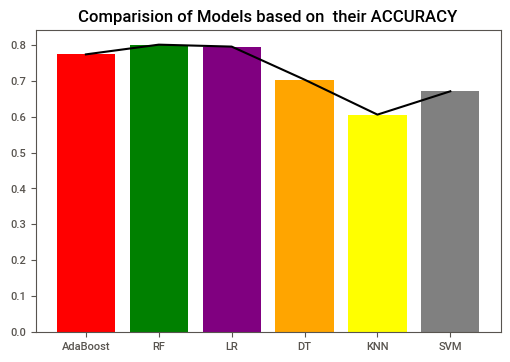

In [216]:
plt.bar(['AdaBoost','RF','LR','DT','KNN','SVM'],[accuracy_ada,accuracy_rf,accuracy_lr,accuracy_dsc,accuracy_knn,accuracy_svm],color=['red','green','purple','orange','yellow','grey'])
plt.plot([accuracy_ada,accuracy_rf,accuracy_lr,accuracy_dsc,accuracy_knn,accuracy_svm],color='black')
plt.title('Comparision of Models based on  their ACCURACY')

### Maximum Accuracy without using SMOTE

In [217]:
print(max(accuracy_ada,accuracy_rf,accuracy_lr,accuracy_dsc,accuracy_knn,accuracy_svm))

0.8


# Using SMOTE

In [218]:
smote=SMOTE()
balanced_x,balanced_y=smote.fit_resample(train_data,y)
print(balanced_x.shape)
print(balanced_y.shape)

(844, 10)
(844,)


In [219]:
balanced_y.value_counts()

0    422
1    422
Name: Loan_Status, dtype: int64

C:\Users\ASUS\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Loan_Status', ylabel='count'>

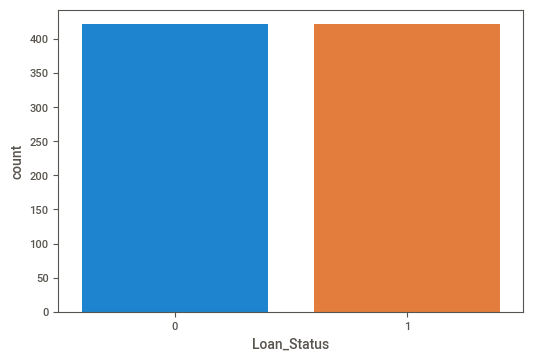

In [220]:
sns.countplot(balanced_y)

## Splitting The DataSet

In [221]:
train_bx,test_bx,train_by,test_by=train_test_split(balanced_x,balanced_y,random_state=555,test_size=0.3)

In [222]:
print(train_bx.shape)
print(test_bx.shape)
print(train_by.shape)
print(test_by.shape)

(590, 10)
(254, 10)
(590,)
(254,)


### Using AdaBoost Classifier

In [223]:
bada=AdaBoostClassifier()
bada.fit(train_bx,train_by)
bpred_ada=bada.predict(test_bx)
accuracy_bada=metrics.accuracy_score(test_by,bpred_ada)
print("The confussion metrix for AdaBoost is:\n",metrics.confusion_matrix(test_by,bpred_ada))
print("The accuracy of AdaBoost Classifier is:\t\t",accuracy_bada)
print("The recal score of AdaBoost Classifier is is:\t\t",metrics.recall_score(test_by,bpred_ada))
print("The precision of AdaBoost Classifier is:\t\t",metrics.precision_score(test_by,bpred_ada))
print("The f1 score of AdaBoost Classifier is:\t\t",metrics.f1_score(test_by,bpred_ada))

The confussion metrix for AdaBoost is:
 [[ 90  38]
 [ 17 109]]
The accuracy of AdaBoost Classifier is:		 0.7834645669291339
The recal score of AdaBoost Classifier is is:		 0.8650793650793651
The precision of AdaBoost Classifier is:		 0.7414965986394558
The f1 score of AdaBoost Classifier is:		 0.7985347985347985


### Using Random Forest Classifer

In [224]:
brf=RandomForestClassifier()
brf.fit(train_bx,train_by)
bpred=brf.predict(test_bx)
accuracy_brf=metrics.accuracy_score(test_by,bpred)
print("The confussion metrix for Random forest is:\n",metrics.confusion_matrix(test_by,bpred))
print("The accuracy of Random Forest Classifier is:\t\t",metrics.accuracy_score(test_by,bpred))
print("The recal score of Random Forest Classifier is:\t\t",metrics.recall_score(test_by,bpred))
print("The precision of Random Forest Classifier is:\t\t",metrics.precision_score(test_by,bpred))
print("The f1 score of Random Forest Classifier is:\t\t",metrics.f1_score(test_by,bpred))

The confussion metrix for Random forest is:
 [[100  28]
 [ 16 110]]
The accuracy of Random Forest Classifier is:		 0.8267716535433071
The recal score of Random Forest Classifier is:		 0.873015873015873
The precision of Random Forest Classifier is:		 0.7971014492753623
The f1 score of Random Forest Classifier is:		 0.8333333333333334


### Using Decision Tree Classifier

In [225]:
bdtc=DecisionTreeClassifier()
bdtc.fit(train_bx,train_by)
bpred_dtc=bdtc.predict(test_bx)
accuracy_bdsc=metrics.accuracy_score(test_by,bpred_dtc)
print("The confussion metrix for Decision Tree is:\n",metrics.confusion_matrix(test_by,bpred_dtc))
print("The accuracy of Decision Tree Classifier is:\t\t",accuracy_bdsc)
print("The recal score of Decision Tree Classifier is:\t\t",metrics.recall_score(test_by,bpred_dtc))
print("The precision of Decision Tree Classifier is:\t\t",metrics.precision_score(test_by,bpred_dtc))
print("The f1 score of Decision Tree Classifier is:\t\t",metrics.f1_score(test_by,bpred_dtc))

The confussion metrix for Decision Tree is:
 [[99 29]
 [33 93]]
The accuracy of Decision Tree Classifier is:		 0.7559055118110236
The recal score of Decision Tree Classifier is:		 0.7380952380952381
The precision of Decision Tree Classifier is:		 0.7622950819672131
The f1 score of Decision Tree Classifier is:		 0.7500000000000001


### Using  Logistic Regression

In [226]:
blr=LogisticRegression(max_iter=5000)
blr.fit(train_bx,train_by)
bpred_lr=blr.predict(test_bx)
accuracy_blr=metrics.accuracy_score(test_by,bpred_lr)
print("The confussion metrix for Logistic Regression is:\n",metrics.confusion_matrix(test_by,bpred_lr))
print("The accuracy of Logistic Regression is:\t\t",accuracy_blr)
print("The recal score Logistic Regression is:\t\t",metrics.recall_score(test_by,bpred_lr))
print("The precision Logistic Regression is:\t\t",metrics.precision_score(test_by,bpred_lr))
print("The f1 score Logistic Regression is:\t\t",metrics.f1_score(test_by,bpred_lr))

The confussion metrix for Logistic Regression is:
 [[ 83  45]
 [ 17 109]]
The accuracy of Logistic Regression is:		 0.7559055118110236
The recal score Logistic Regression is:		 0.8650793650793651
The precision Logistic Regression is:		 0.7077922077922078
The f1 score Logistic Regression is:		 0.7785714285714286


### Using KNN Classifier

In [227]:
bkn=KNeighborsClassifier()
bkn.fit(train_bx,train_by)
bpred_kn=kn.predict(test_bx)
accuracy_bknn=metrics.accuracy_score(test_by,bpred_kn)
print("The confussion metrix for KNN Classifier is:\n",metrics.confusion_matrix(test_by,bpred_kn))
print("The accuracy of KNN Classifier is:\t\t",accuracy_bknn)
print("The recal score of KNN Classifier is is:\t\t",metrics.recall_score(test_by,bpred_kn))
print("The precision of KNN Classifier is:\t\t",metrics.precision_score(test_by,bpred_kn))
print("The f1 score of KNN Classifier is:\t\t",metrics.f1_score(test_by,bpred_kn))

The confussion metrix for KNN Classifier is:
 [[ 29  99]
 [ 11 115]]
The accuracy of KNN Classifier is:		 0.5669291338582677
The recal score of KNN Classifier is is:		 0.9126984126984127
The precision of KNN Classifier is:		 0.5373831775700935
The f1 score of KNN Classifier is:		 0.6764705882352942


### Using SVC

In [228]:
bsvc=SVC()
bsvc.fit(train_bx,train_by)
bpred_svc=bsvc.predict(test_bx)
accuracy_bsvm=metrics.accuracy_score(test_by,bpred_svc)
print("The confussion metrix for SVM Classifier is:\n",metrics.confusion_matrix(test_by,bpred_svc))
print("The accuracy of SVM Classifier is:\t\t",accuracy_bsvm)
print("The recal score of SVM Classifier is is:\t\t",metrics.recall_score(test_by,bpred_svc))
print("The precision of SVM Classifier is:\t\t",metrics.precision_score(test_by,bpred_svc))
print("The f1 score of SVM Classifier is:\t\t",metrics.f1_score(test_by,bpred_svc))

The confussion metrix for SVM Classifier is:
 [[45 83]
 [38 88]]
The accuracy of SVM Classifier is:		 0.5236220472440944
The recal score of SVM Classifier is is:		 0.6984126984126984
The precision of SVM Classifier is:		 0.5146198830409356
The f1 score of SVM Classifier is:		 0.5925925925925926


Text(0.5, 1.0, 'Comparision of Models based on  their ACCURACY while using SMOTE')

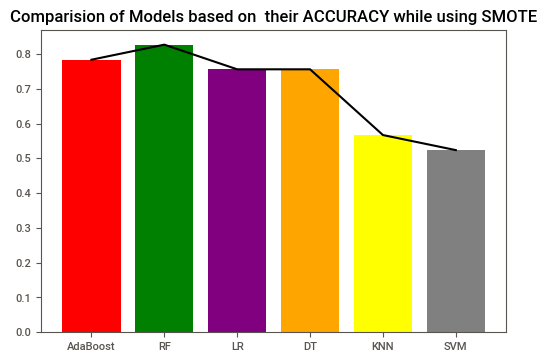

In [229]:
plt.bar(['AdaBoost','RF','LR','DT','KNN','SVM'],[accuracy_bada,accuracy_brf,accuracy_blr,accuracy_bdsc,accuracy_bknn,accuracy_bsvm],color=['red','green','purple','orange','yellow','grey'])
plt.plot([accuracy_bada,accuracy_brf,accuracy_blr,accuracy_bdsc,accuracy_bknn,accuracy_bsvm],color='black')
plt.title('Comparision of Models based on  their ACCURACY while using SMOTE')

### Maximum Accuracy while using Using SMOTE

In [230]:
print(max(accuracy_bada,accuracy_brf,accuracy_blr,accuracy_bdsc,accuracy_bknn,accuracy_bsvm))

0.8267716535433071


# Comparison of accuracies of different models while using them without SMOTE and with SMOTE 

Text(0.5, 1.0, 'Comparision of AdaBoost Models based on  their ACCURACY\n\n\n')

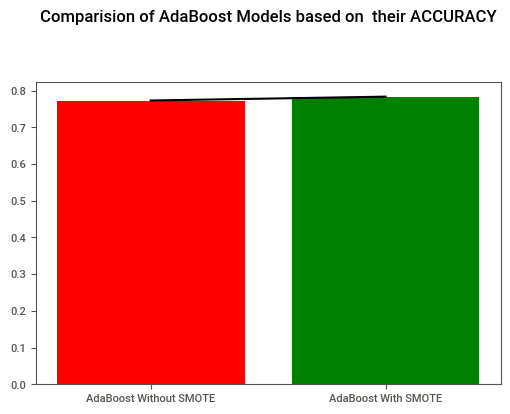

In [231]:
plt.bar(['AdaBoost Without SMOTE','AdaBoost With SMOTE'],[accuracy_ada,accuracy_bada],color=['red','green'])
plt.plot([accuracy_ada,accuracy_bada],color='black')
plt.title('Comparision of AdaBoost Models based on  their ACCURACY\n\n\n')

Text(0.5, 1.0, 'Comparision of Random Forest Models based on  their ACCURACY\n\n\n')

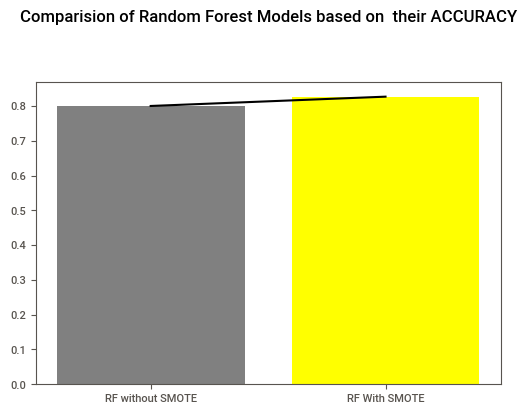

In [232]:
plt.bar(['RF without SMOTE','RF With SMOTE'],[accuracy_rf,accuracy_brf],color=['grey','yellow'])
plt.plot([accuracy_rf,accuracy_brf],color='black')
plt.title('Comparision of Random Forest Models based on  their ACCURACY\n\n\n')

Text(0.5, 1.0, 'Comparision of Logistic Regression Models based on  their ACCURACY\n\n\n')

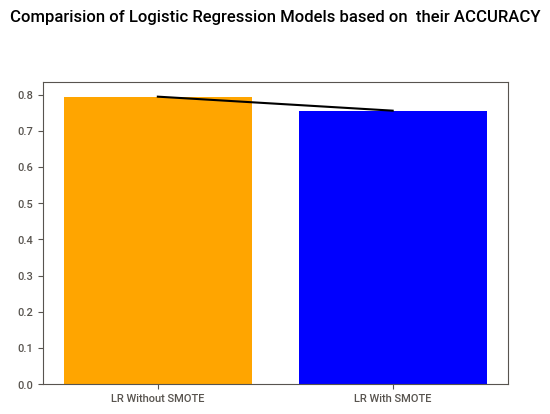

In [233]:
plt.bar(['LR Without SMOTE','LR With SMOTE'],[accuracy_lr,accuracy_blr],color=['orange','blue'])
plt.plot([accuracy_lr,accuracy_blr],color='black')
plt.title('Comparision of Logistic Regression Models based on  their ACCURACY\n\n\n')

Text(0.5, 1.0, 'Comparision of KNN Models based on  their ACCURACY\n\n\n')

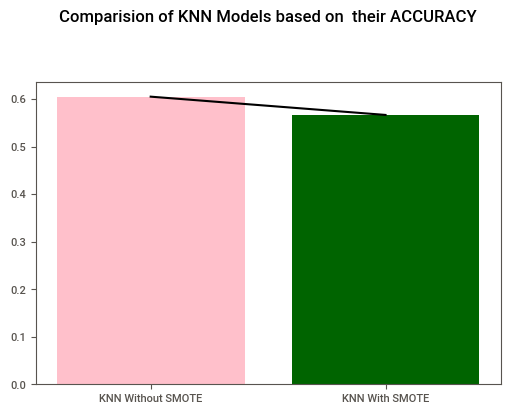

In [234]:
plt.bar(['KNN Without SMOTE','KNN With SMOTE'],[accuracy_knn,accuracy_bknn],color=['pink','darkgreen'])
plt.plot([accuracy_knn,accuracy_bknn],color='black')
plt.title('Comparision of KNN Models based on  their ACCURACY\n\n\n')

Text(0.5, 1.0, 'Comparision of SVM Models based on  their ACCURACY\n\n\n')

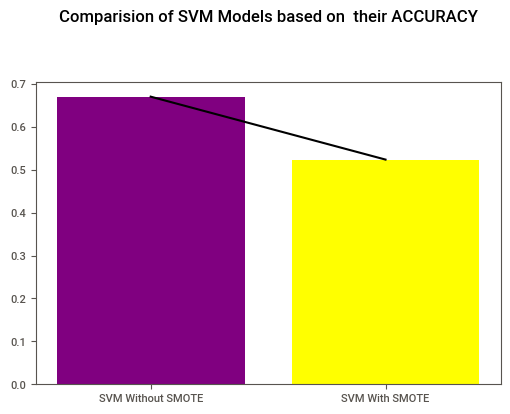

In [235]:
plt.bar(['SVM Without SMOTE','SVM With SMOTE'],[accuracy_svm,accuracy_bsvm],color=['purple','yellow'])
plt.plot([accuracy_svm,accuracy_bsvm],color='black')
plt.title('Comparision of SVM Models based on  their ACCURACY\n\n\n')

Text(0.5, 1.0, 'Comparision of Decision Tree Models based on  their ACCURACY\n\n\n')

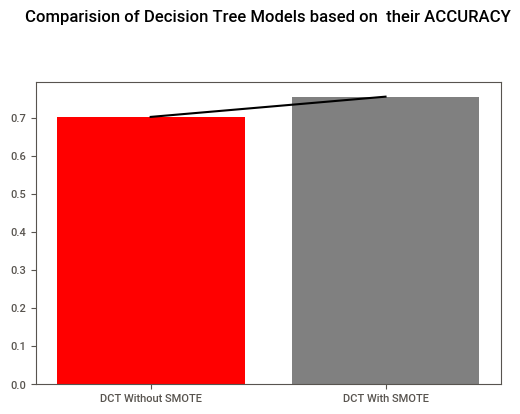

In [236]:
plt.bar(['DCT Without SMOTE','DCT With SMOTE'],[accuracy_dsc,accuracy_bdsc],color=['red','grey'])
plt.plot([accuracy_dsc,accuracy_bdsc],color='black')
plt.title('Comparision of Decision Tree Models based on  their ACCURACY\n\n\n')